# Credit Risk Analysis Model -Lending Club

# EDA

__Import all libraries__

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

__Load Dataset of Lending club 2018__

In [60]:
data=pd.read_csv("../.../../Data/LendingClub_2018.csv")
data.head()

C:\Users\SRIDHAR\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,19,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,124036600,NaN,14400.0,14400.0,14400.0,60 months,11.99,320.25,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,124032422,NaN,10000.0,10000.0,10000.0,36 months,6.08,304.59,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,121263276,NaN,9000.0,9000.0,9000.0,36 months,9.93,290.11,B,B2,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
3,124031429,NaN,25000.0,25000.0,25000.0,60 months,9.44,524.32,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,122281350,NaN,17000.0,17000.0,17000.0,36 months,19.03,623.42,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
#check the shape of data
data.shape

(299998, 151)

This is the associated data dictionary describing the data features. Below the dictionary is combined with the dataset data types, first row values and information on data completeness. (Note that the data dictionary and dataset are indexed differently and so are joined on the shared feature column.)

In [9]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

data_dictionary = pd.read_excel('../.../../Data/LCDataDictionary.xlsx').dropna()
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'feature', 'Description': 'description'})

to_join_df = pd.DataFrame(data.dtypes,columns=['dtypes'])
to_join_df.reset_index(inplace=True)
to_join_df.rename(columns = {'index':'feature'}, inplace = True)
to_join_df["first_row"] = data.loc[0].values
to_join_df["%data_missing"] = (data.isnull().sum()/data.shape[0]*100).values

data_preview = to_join_df.merge(data_dictionary, on ='feature',how ='left')
display_all(data_preview.style.set_properties(subset=['description'], **{'width': '1000px'}))

,feature,dtypes,first_row,%data_missing,description
0,id,object,124036600,0.000000,A unique LC assigned ID for the loan listing.
1,member_id,float64,nan,100.000000,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,14400.000000,0.001333,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,14400.000000,0.001333,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,14400.000000,0.001333,The total amount committed by investors for that loan at that point in time.
5,term,object,60 months,0.001333,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,float64,11.990000,0.001333,Interest Rate on the loan
7,installment,float64,320.250000,0.001333,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,0.001333,LC assigned loan grade
9,sub_grade,object,B5,0.001333,LC assigned loan subgrade


__Data Exploration__

__Loan status Review__

*Loans that are in "Default" are loans for which borrowers have failed to make payments for an extended period of time.

*A loan becomes “Charged Off” when there is no longer a reasonable expectation of further payments. Charge Off typically occurs when a loan is 120 days or more past due and there is no reasonable expectation of sufficient payment to prevent the charge off.

*Fully Paid. Loan has been fully repaid, either at the expiration of the 3- or 5-year year term or as a result of a prepayment.

*Loan is past due but within the 15-day grace period.

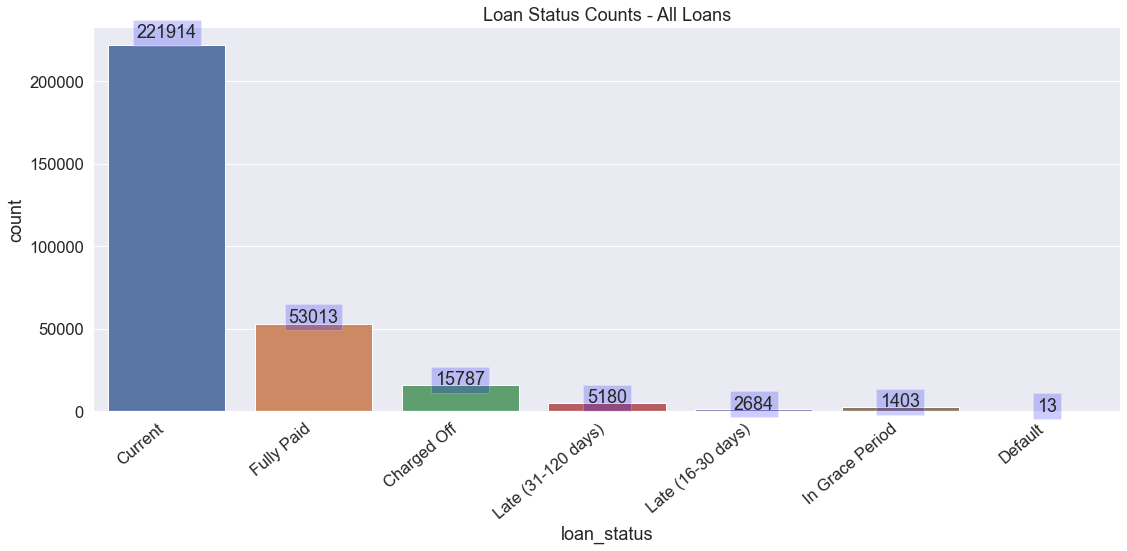

In [23]:
sns.set(font_scale=1.5)
fig = plt.gcf()
fig.set_size_inches( 16, 8)    

ax = sns.countplot(x="loan_status", data=data) 
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Loan Status Counts - All Loans")

plt.tight_layout()

vals = data["loan_status"].value_counts()
for idx, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + height*.02,
            vals[idx], bbox=dict(facecolor='blue', alpha=0.2),
            ha="center")

Text(0, 0.5, 'Loan Amount')

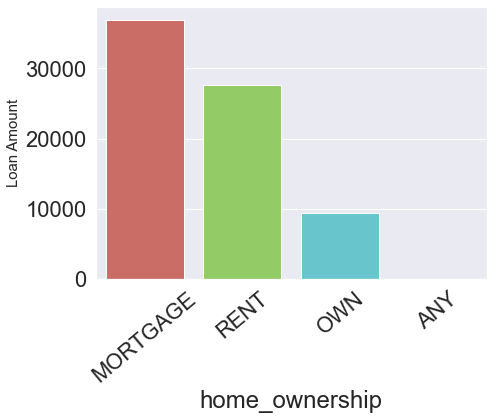

In [43]:
# Application Type and Loan Amount
plt.figure(figsize = (7,5))
g = sns.countplot(x="home_ownership",data=data,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=40)
g.set_ylabel("Loan Amount", fontsize=15)

Text(0, 0.5, 'Loan Amount')

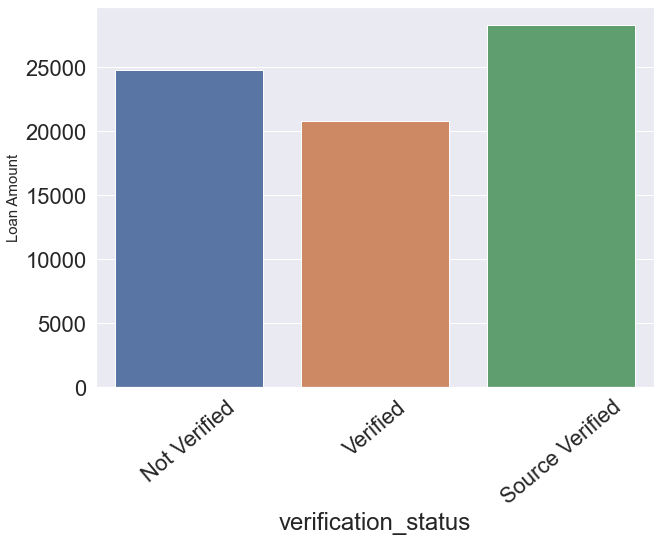

In [42]:
# Application Type and Loan Amount
plt.figure(figsize = (10,7))
g = sns.countplot(x="verification_status",data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=40)
g.set_ylabel("Loan Amount", fontsize=15)

In [52]:
# Crosstabulation of Purpose and Loan Status
purp_loan= ['verification_status', 'loan_status']
#cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(data[purp_loan[0]], data[purp_loan[1]])

loan_status,Default,Non Default
verification_status,,
Not Verified,5376,19436
Source Verified,7995,20350
Verified,7609,13227


In [109]:
# Crosstabulation of Purpose and Loan Status
purp_loan= ['home_ownership', 'loan_status']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(data[purp_loan[0]], data[purp_loan[1]])

loan_status,Default,Non Default
home_ownership,,
ANY,0,1
MORTGAGE,8647,28265
OWN,2658,6752
RENT,9675,17995


In [50]:
# Crosstabulation of Purpose and Loan Status
purp_loan= ['purpose', 'loan_status']
#cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(data[purp_loan[0]], data[purp_loan[1]])

loan_status,Default,Non Default
purpose,,
car,152,667
credit_card,3897,11257
debt_consolidation,12475,29581
home_improvement,1296,4002
house,169,480
major_purchase,513,1358
medical,321,710
moving,197,378
other,1452,3690


__Loan Amount Distribution__

Text(0.5, 1.0, 'Loan Amounts Distribution')

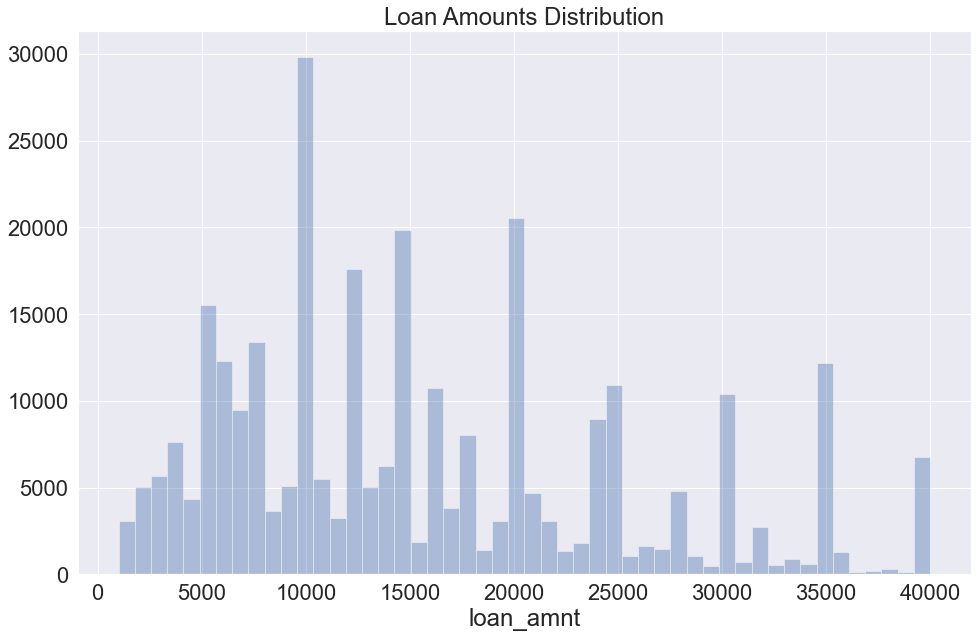

In [22]:
fig= plt.gcf()
fig.set_size_inches( 16, 10)
sns.distplot( a=data["loan_amnt"], hist=True, kde=False, rug=False ).set_title("Loan Amounts Distribution")

__Purpose of the Loan__

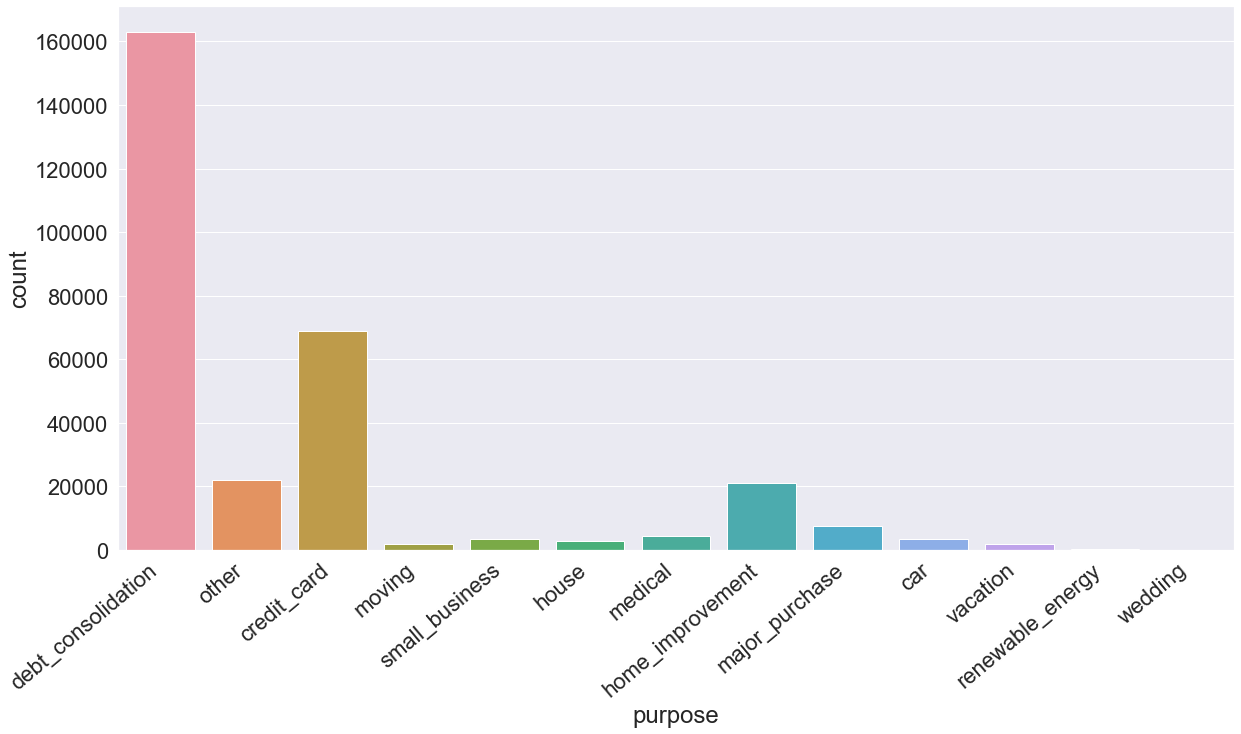

In [26]:
sns.set(font_scale=2)
fig = plt.gcf()
fig.set_size_inches(20, 10)    


ax = sns.countplot(x="purpose", data=data);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
#ax.set_title("Loan Purposes",size=30)

__Employee Ttitle__

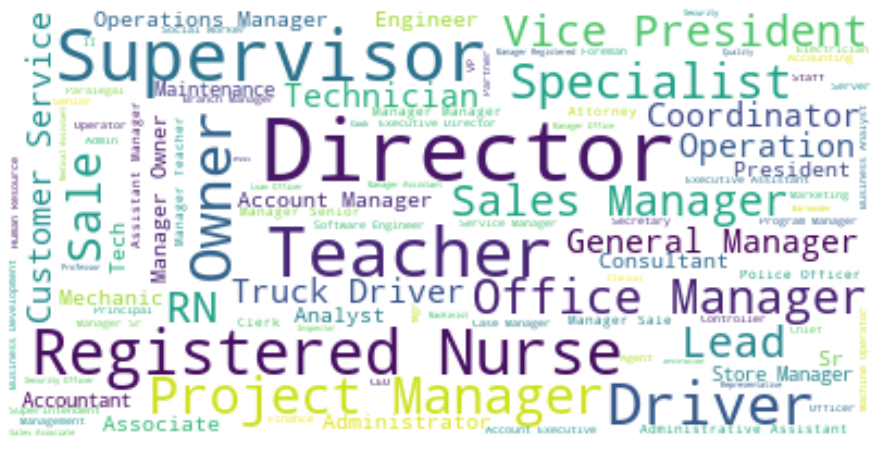

In [100]:
text = data["emp_title"].str.cat(sep=' ')
# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=40, max_words=100, background_color="white").generate(text)
plt.figure(figsize=[16,8])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [63]:
data['loan_status'].value_counts()

Current               221914
Fully Paid             53013
Charged Off            15787
Late (31-120 days)      5180
In Grace Period         2684
Late (16-30 days)       1403
Default                   13
Name: loan_status, dtype: int64

Consider only Fully paid, Chargedoff, Late(31-120) days, Default only

In [64]:
data = data[(data["loan_status"] == "Fully Paid") | (data["loan_status"] == "Charged Off") |(data["loan_status"]=="Late (31-120 days)")|(data["loan_status"]=="Default")]


In [65]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
4,122281350,NaN,17000.0,17000.0,17000.0,36 months,19.03,623.42,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
17,124049596,NaN,12000.0,12000.0,12000.0,36 months,7.97,375.88,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
30,122421190,NaN,30950.0,30950.0,30950.0,36 months,24.85,1228.12,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
31,124053722,NaN,8000.0,8000.0,8000.0,36 months,13.59,271.84,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
43,123881360,NaN,20000.0,20000.0,20000.0,60 months,19.03,519.15,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299953,126279931,NaN,35175.0,35175.0,35150.0,36 months,17.09,1255.67,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
299954,125953399,NaN,7400.0,7400.0,7375.0,36 months,17.09,264.17,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
299965,126314685,NaN,20000.0,20000.0,19975.0,36 months,12.62,670.23,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
299992,126178769,NaN,12000.0,12000.0,12000.0,60 months,12.62,270.71,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
data['loan_status'].value_counts()

Fully Paid            53013
Charged Off           15787
Late (31-120 days)     5180
Default                  13
Name: loan_status, dtype: int64

In [67]:
loan_status_dict={'Fully Paid':'Non Default','Charged Off':'Default','Late (31-120 days)':'Default','Default':'Default'}
#loan_status_check = df["loan_status"]
data["loan_status"]=data["loan_status"].apply(loan_status_dict.get)

__Loan status and loan amount distribution__

This is an imbalance problem, because we have a lot more entries of people that fully paid their loans then people that did not pay back.
We can expect to probably do very well in terms of accuracy but our precision and recall are going to be the true metrics that we will have to evaluate our model based off of.
In the loan amount distribution we can see spikes in even ten thousend dollar, so this is indicating that there are certain amounts that are basically standard loans.

[Text(0, 0.5, 'Number of Customers'), Text(0.5, 0, 'Loan Amount')]

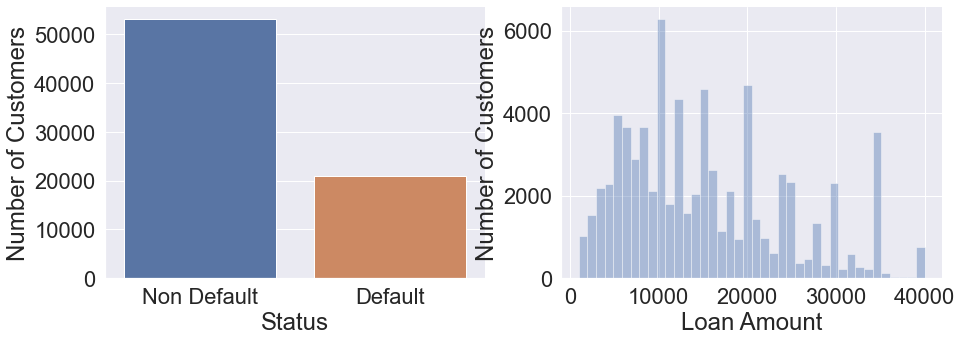

In [68]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='loan_status', data=data, ax=axes[0])
sns.distplot(data['loan_amnt'], kde=False, bins=40, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='Number of Customers')
#axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Loan Amount', ylabel='Number of Customers')
#axes[1].set_title('Loan Amount Distribution', size=20)

__Loan status and loan amount distribution__

This is an imbalance problem, because we have a lot more entries of people that fully paid their loans then people that did not pay back.
We can expect to probably do very well in terms of accuracy but our precision and recall are going to be the true metrics that we will have to evaluate our model based off of.
In the Default amount distribution we can see spikes in even ten thousend dollar, so this is indicating that there are certain amounts that are basically standard loans.

[Text(0, 0.5, 'Number of Customers'), Text(0.5, 0, 'Default Loan Amount')]

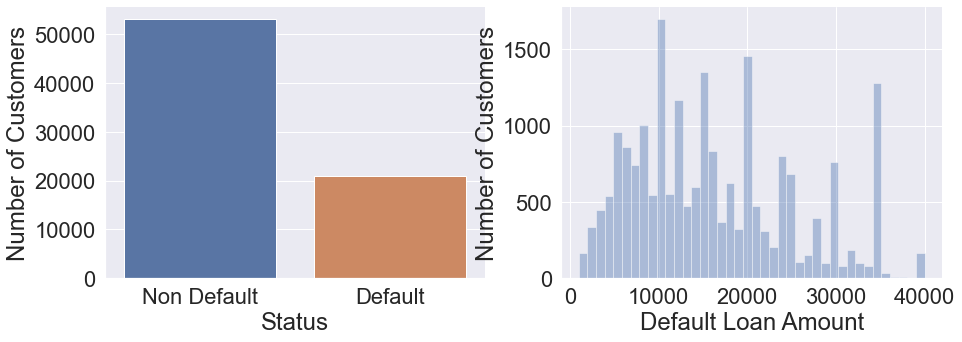

In [38]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x='loan_status', data=data, ax=axes[0])
sns.distplot(d['loan_amnt'], kde=False, bins=40, ax=axes[1])
sns.despine()
axes[0].set(xlabel='Status', ylabel='Number of Customers')
#axes[0].set_title('Count of Loan Status', size=20)
axes[1].set(xlabel='Default Loan Amount', ylabel='Number of Customers')
#axes[1].set_title('Loan Amount Distribution', size=20)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

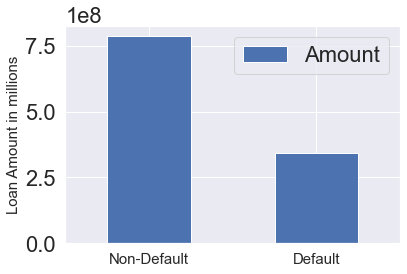

In [39]:
# Total loan Amount for default and non default
plotdata = pd.DataFrame({"Amount": [nond_amount, d_amount]},index=["Non-Default","Default"])
plotdata.plot(kind="bar")
plt.ylabel("Loan Amount in millions",size=15)
plt.xticks(rotation=0.1, horizontalalignment="center",size=15)
#plotdata.plot(kind='bar', stacked=True,color=['blue','red'])

Text(0, 0.5, 'Loan Amount')

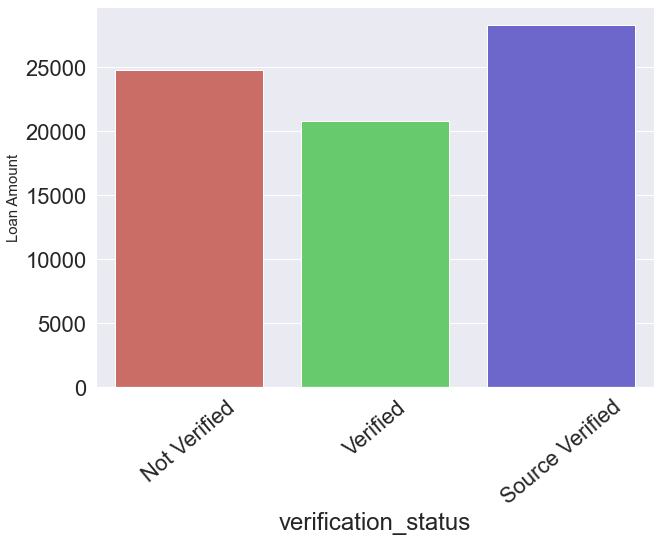

In [54]:
# Application Type and Loan Amount
plt.figure(figsize = (10,7))
g = sns.countplot(x="verification_status",data=data,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=40)
g.set_ylabel("Loan Amount", fontsize=15)

Text(0, 0.5, 'Loan Amount')

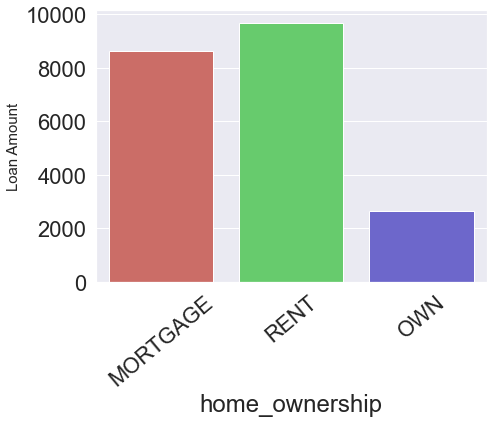

In [106]:
# Application Type and Loan Amount
plt.figure(figsize = (7,5))
g = sns.countplot(x="home_ownership",data=d,color='blue',
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=40)
g.set_ylabel("Loan Amount", fontsize=15)

__Only Non Deafault records__

In [69]:
nond=data[data['loan_status']=='Non Default']
nond

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
4,122281350,NaN,17000.0,17000.0,17000.0,36 months,19.03,623.42,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
17,124049596,NaN,12000.0,12000.0,12000.0,36 months,7.97,375.88,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
30,122421190,NaN,30950.0,30950.0,30950.0,36 months,24.85,1228.12,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
47,123930287,NaN,3000.0,3000.0,3000.0,36 months,10.42,97.40,B,B3,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
49,121809764,NaN,7000.0,7000.0,7000.0,36 months,20.00,260.15,D,D4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299929,126348077,NaN,15000.0,15000.0,14725.0,36 months,7.35,465.57,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
299938,126315992,NaN,35000.0,35000.0,34950.0,36 months,6.08,1066.04,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
299954,125953399,NaN,7400.0,7400.0,7375.0,36 months,17.09,264.17,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
299992,126178769,NaN,12000.0,12000.0,12000.0,60 months,12.62,270.71,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
nond_amount=nond['loan_amnt'].sum()
nond_amount

786645950.0

__Only Defaulte Records__

In [71]:
d=data[data['loan_status']=='Default']
d

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
31,124053722,NaN,8000.0,8000.0,8000.0,36 months,13.59,271.84,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
43,123881360,NaN,20000.0,20000.0,20000.0,60 months,19.03,519.15,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
68,121843661,NaN,25000.0,25000.0,25000.0,60 months,18.06,635.66,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
100,124044034,NaN,19125.0,19125.0,19125.0,60 months,13.59,440.96,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
133,122369850,NaN,35000.0,35000.0,35000.0,60 months,16.02,851.51,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299923,125381565,NaN,5000.0,5000.0,5000.0,36 months,7.35,155.19,A,A4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
299942,126160656,NaN,10000.0,10000.0,10000.0,60 months,17.09,249.01,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
299943,126161937,NaN,10000.0,10000.0,9975.0,36 months,16.02,351.67,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
299953,126279931,NaN,35175.0,35175.0,35150.0,36 months,17.09,1255.67,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
d_amount=d['loan_amnt'].sum()
d_amount

340938650.0

In [73]:
#Total loan Amount
data['loan_amnt'].sum()

1127584600.0

__Customer Loan Grade vs Loan status__

Text(0, 0.5, 'Number of Customers')

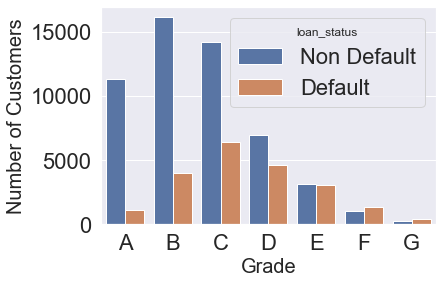

In [74]:
Order=sorted(data.grade.unique())
sns.countplot(x=data.grade,data=data,order=Order,hue='loan_status')
plt.xlabel("Grade",size=20)
plt.ylabel("Number of Customers",size=20)

Text(0, 0.5, 'Number of Customers')

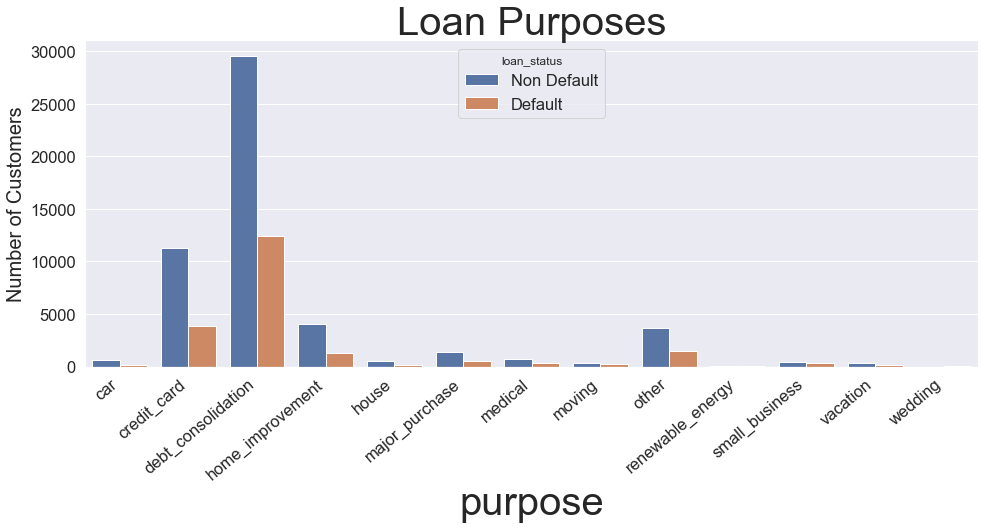

In [108]:
sns.set(font_scale=1.5)
fig = plt.gcf()
fig.set_size_inches(16, 6)    
Order=sorted(data.purpose.unique())

ax = sns.countplot(x=data.purpose,data=data,order=Order,hue='loan_status')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Loan Purposes",size=40)


#sns.countplot(x=data.purpose,data=data,order=Order,hue='loan_status')
plt.xlabel("purpose",size=40)
plt.ylabel("Number of Customers",size=20)

__Employee Length Vs loan status__

Text(0, 0.5, 'Number of Customers')

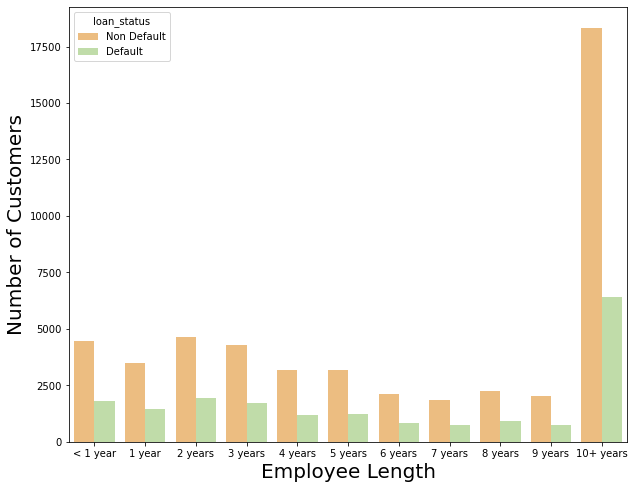

In [16]:
plt.figure(figsize=(10,8))
data.emp_length.value_counts()
sns.countplot(x=data.emp_length,data=data,palette='Spectral',order=[ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years'],hue='loan_status')
#print(cat_.emp_length.isnull().sum())
plt.xlabel("Employee Length",size=20)
plt.ylabel("Number of Customers",size=20)

In [75]:
data['loan_status'].value_counts()

Non Default    53013
Default        20980
Name: loan_status, dtype: int64

In [76]:
# Categories in percentage
data['loan_status'].value_counts(normalize=True, dropna=False)*100

Non Default    71.645967
Default        28.354033
Name: loan_status, dtype: float64

In [77]:
for c in data.columns:
    print('  - %-20s:  %d' % (c, data[c].isna().sum()))

  - id                  :  0
  - member_id           :  73993
  - loan_amnt           :  0
  - funded_amnt         :  0
  - funded_amnt_inv     :  0
  - term                :  0
  - int_rate            :  0
  - installment         :  0
  - grade               :  0
  - sub_grade           :  0
  - emp_title           :  5284
  - emp_length          :  5241
  - home_ownership      :  0
  - annual_inc          :  0
  - verification_status :  0
  - issue_d             :  0
  - loan_status         :  0
  - pymnt_plan          :  0
  - url                 :  0
  - desc                :  73988
  - purpose             :  0
  - title               :  4282
  - zip_code            :  0
  - addr_state          :  0
  - dti                 :  46
  - delinq_2yrs         :  0
  - earliest_cr_line    :  0
  - fico_range_low      :  0
  - fico_range_high     :  0
  - inq_last_6mths      :  1
  - mths_since_last_delinq:  36612
  - mths_since_last_record:  60292
  - open_acc            :  0
  - pub_rec  

# __Deleted Unwnted features__

Our objective is to predict loan default using only the data we will have at the start of the lending process. That is, we wish to prevent data leakage influencing our loan performance model. Accordingly we will remove those features that would not be known when the loan application is being assessed. We also have features with a large amount of missing data. Those features that have more than 50% missing values are deleted. Finally there are features irrelevant to the loan application that are also removed. Note that these 3 classifications are not necessarily disjoint.

In this part we wish to drop features that are recorded in the future. These features are not available to us when applying for loans and should not be taken in consideration

In [78]:
leak_cols = ['acc_now_delinq', 'acc_open_past_24mths', 'avg_cur_bal', 
             'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 
             'collection_recovery_fee', 'collections_12_mths_ex_med', 
             'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 
             'disbursement_method', 'funded_amnt', 'funded_amnt_inv', 
             'hardship_flag', 'inq_last_6mths', 'last_credit_pull_d', 
             'initial_list_status', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct',
             'last_pymnt_amnt', 
             'last_pymnt_d', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 
             'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 
             'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 
             'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 
             'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 
             'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',  
             'out_prncp', 'out_prncp_inv', 'pct_tl_nvr_dlq', 
             'percent_bc_gt_75', 'pymnt_plan', 'recoveries', 
             'tax_liens', 'tot_coll_amt', 'tot_cur_bal', 
             'tot_hi_cred_lim','total_bal_ex_mort', 'total_bc_limit', 
             'total_il_high_credit_limit', 'total_pymnt', 'total_pymnt_inv', 
             'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 
             'total_rev_hi_lim','title','issue_d','earliest_cr_line','zip_code',
            'id','url','mths_since_last_delinq','open_acc_6m','open_act_il',
             'open_il_12m','mths_since_rcnt_il','open_il_24m','total_bal_il','il_util',
             'open_rv_12m','open_rv_24m','max_bal_bc','all_util','inq_fi','total_cu_tl',
             'inq_last_12m','last_fico_range_high','last_fico_range_low','emp_title']

In [79]:
#drop leaks
df_small = data.drop(columns=leak_cols, axis=1)

drop_col_count = len(leak_cols)
print("The new dataframe has {} columns and lost {} after dropping future leaks".format(df_small.shape[1],
                                                                           drop_col_count))

The new dataframe has 68 columns and lost 83 after dropping future leaks


In [80]:
df_small.shape

(73993, 68)

Coloumns with no variance:
We need to check if any feature repeats only 1 feature and is therefore useless to us. This will take out uncessary dimensions and remove noise. One might consider this a case of pre-pruning for tree based models.

In [81]:
#remove columns that have only 1 feature
#get unique values per feature
nunique_value = df_small.apply(pd.Series.nunique)
#note columns that have single value
single_value_cols = nunique_value[nunique_value == 1].index.tolist()

In [82]:
single_value_cols

['policy_code', 'hardship_type', 'deferral_term', 'hardship_length']

In [83]:
# drop the redundant columns
df_small = df_small.drop(columns=single_value_cols)

In [84]:
df=df_small

In [85]:
#make dataframe to record mean missing
nan_df = pd.DataFrame(df.isna().mean(), columns=['mean_nan'])
#add dtypes
nan_df['dtypes'] = df.dtypes
#sort by most missing at top
nan_df = nan_df.sort_values(by=['mean_nan'], ascending=False)

nan_df = nan_df.reset_index()

nan_df.head()

,index,mean_nan,dtypes
0,member_id,1.000000,float64
1,desc,0.999932,object
2,orig_projected_additional_accrued_interest,0.996473,float64
3,hardship_last_payment_amount,0.994418,float64
4,hardship_payoff_balance_amount,0.994418,float64


In [86]:
#tally of average mission values
nan_df.mean()
nan_df.std()

mean_nan    0.467831
dtype: float64

In [87]:
#set the minimum missing percentage
nan_pct_min = 0.5

#get columns with more missing values than minimum
missing_cols = nan_df[nan_df['mean_nan']>=nan_pct_min]['index']

#drop the columns
df_drop_nan = df.drop(columns=missing_cols)

#see new shape
df_drop_nan.shape

(73993, 24)

In [88]:
df=df_drop_nan

In [89]:
df.shape

(73993, 24)

In [90]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
fico_range_low          float64
fico_range_high         float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
dtype: object

__Missing values of each feature__

In [91]:
for c in df.columns:
    print('  - %-20s:  %d' % (c, df[c].isna().sum()))

  - loan_amnt           :  0
  - term                :  0
  - int_rate            :  0
  - installment         :  0
  - grade               :  0
  - sub_grade           :  0
  - emp_length          :  5241
  - home_ownership      :  0
  - annual_inc          :  0
  - verification_status :  0
  - loan_status         :  0
  - purpose             :  0
  - addr_state          :  0
  - dti                 :  46
  - fico_range_low      :  0
  - fico_range_high     :  0
  - open_acc            :  0
  - pub_rec             :  0
  - revol_bal           :  0
  - revol_util          :  64
  - total_acc           :  0
  - application_type    :  0
  - mort_acc            :  0
  - pub_rec_bankruptcies:  0


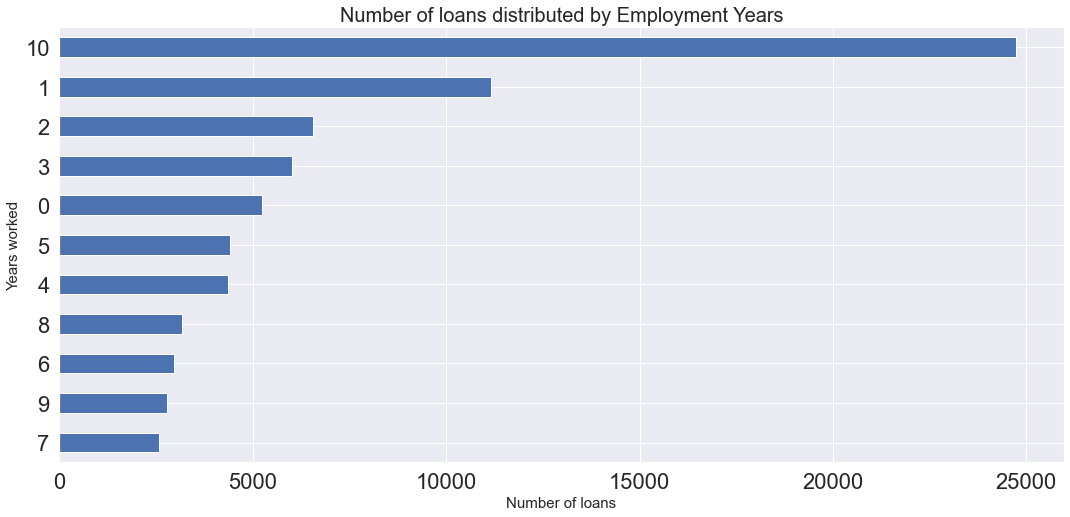

In [92]:
# Fill all NaN values to 0 means customer has less than one year length

df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

In [93]:
df.dropna(inplace=True)

In [94]:
for c in df.columns:
    print('  - %-20s:  %d' % (c, df[c].isna().sum()))

  - loan_amnt           :  0
  - term                :  0
  - int_rate            :  0
  - installment         :  0
  - grade               :  0
  - sub_grade           :  0
  - emp_length          :  0
  - home_ownership      :  0
  - annual_inc          :  0
  - verification_status :  0
  - loan_status         :  0
  - purpose             :  0
  - addr_state          :  0
  - dti                 :  0
  - fico_range_low      :  0
  - fico_range_high     :  0
  - open_acc            :  0
  - pub_rec             :  0
  - revol_bal           :  0
  - revol_util          :  0
  - total_acc           :  0
  - application_type    :  0
  - mort_acc            :  0
  - pub_rec_bankruptcies:  0


In [95]:
df.shape

(73883, 24)

In [96]:
from sklearn import preprocessing

count = 0

for col in df:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[col] = le.fit_transform(df[col])
            count += 1
            print (col)
            
print('%d columns were label encoded.' % count)

term
loan_status
application_type
3 columns were label encoded.


In [97]:
#catagorical variables
df.select_dtypes(include=["object"]).iloc[0]

grade                                   D
sub_grade                              D3
emp_length                              1
home_ownership                   MORTGAGE
verification_status          Not Verified
purpose                debt_consolidation
addr_state                             TX
Name: 4, dtype: object

In [98]:
df.shape

(73883, 24)

In [99]:
#remove unwanted charecters
df.columns=df.columns.str.replace('_',' ')

In [100]:
#capitalize first letter of each word
df.columns=df.columns.str.title()

In [101]:
df=df.rename(columns={"Int Rate": "Interest Rate", "Emp Length": "Employee Length","Mort Acc":"Mortagage Account",
                     "Loan Amnt":"Loan Amount","Annual Inc":"Annual Income"})

In [102]:
for c in df.columns:
    print(c)

Loan Amount
Term
Interest Rate
Installment
Grade
Sub Grade
Employee Length
Home Ownership
Annual Income
Verification Status
Loan Status
Purpose
Addr State
Dti
Fico Range Low
Fico Range High
Open Acc
Pub Rec
Revol Bal
Revol Util
Total Acc
Application Type
Mortagage Account
Pub Rec Bankruptcies


In [103]:
df.shape

(73883, 24)

In [55]:
df_grade=df

In [104]:
# save data without dummies
df.to_csv('data_without_dummy.csv', index=None)

In [56]:
df_grade

,Loan Amount,Term,Interest Rate,Installment,Grade,Sub Grade,Employee Length,Home Ownership,Annual Income,Verification Status,...,Fico Range Low,Fico Range High,Open Acc,Pub Rec,Revol Bal,Revol Util,Total Acc,Application Type,Mortagage Account,Pub Rec Bankruptcies
4,17000.0,0,19.03,623.42,D,D3,1,MORTGAGE,105000.00,Not Verified,...,675.0,679.0,19.0,0.0,14878.0,26.3,37.0,0,1.0,0.0
17,12000.0,0,7.97,375.88,A,A5,10,MORTGAGE,115000.00,Not Verified,...,705.0,709.0,7.0,0.0,2125.0,27.6,14.0,0,3.0,0.0
30,30950.0,0,24.85,1228.12,E,E3,10,RENT,80000.00,Verified,...,695.0,699.0,19.0,0.0,18571.0,37.4,32.0,0,0.0,0.0
31,8000.0,0,13.59,271.84,C,C2,2,MORTGAGE,90000.00,Not Verified,...,660.0,664.0,22.0,0.0,13340.0,46.0,25.0,0,2.0,0.0
43,20000.0,1,19.03,519.15,D,D3,0,MORTGAGE,35000.00,Not Verified,...,665.0,669.0,10.0,0.0,1746.0,12.6,15.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299953,35175.0,0,17.09,1255.67,D,D1,10,MORTGAGE,100000.00,Verified,...,680.0,684.0,13.0,0.0,36862.0,75.5,29.0,1,5.0,0.0
299954,7400.0,0,17.09,264.17,D,D1,1,MORTGAGE,49900.00,Source Verified,...,660.0,664.0,13.0,0.0,5422.0,25.3,34.0,0,3.0,0.0
299965,20000.0,0,12.62,670.23,C,C1,10,OWN,50000.00,Not Verified,...,700.0,704.0,12.0,0.0,7966.0,28.7,16.0,0,0.0,0.0
299992,12000.0,1,12.62,270.71,C,C1,0,MORTGAGE,89625.39,Not Verified,...,660.0,664.0,10.0,0.0,18601.0,90.3,37.0,0,1.0,0.0


__Data set without Grade, subgrade__

In [57]:
df1_grade=df_grade.drop(['Grade','Sub Grade'],axis=1)

In [58]:
df1_grade

,Loan Amount,Term,Interest Rate,Installment,Employee Length,Home Ownership,Annual Income,Verification Status,Loan Status,Purpose,...,Fico Range Low,Fico Range High,Open Acc,Pub Rec,Revol Bal,Revol Util,Total Acc,Application Type,Mortagage Account,Pub Rec Bankruptcies
4,17000.0,0,19.03,623.42,1,MORTGAGE,105000.00,Not Verified,1,debt_consolidation,...,675.0,679.0,19.0,0.0,14878.0,26.3,37.0,0,1.0,0.0
17,12000.0,0,7.97,375.88,10,MORTGAGE,115000.00,Not Verified,1,home_improvement,...,705.0,709.0,7.0,0.0,2125.0,27.6,14.0,0,3.0,0.0
30,30950.0,0,24.85,1228.12,10,RENT,80000.00,Verified,1,debt_consolidation,...,695.0,699.0,19.0,0.0,18571.0,37.4,32.0,0,0.0,0.0
31,8000.0,0,13.59,271.84,2,MORTGAGE,90000.00,Not Verified,0,credit_card,...,660.0,664.0,22.0,0.0,13340.0,46.0,25.0,0,2.0,0.0
43,20000.0,1,19.03,519.15,0,MORTGAGE,35000.00,Not Verified,0,home_improvement,...,665.0,669.0,10.0,0.0,1746.0,12.6,15.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299953,35175.0,0,17.09,1255.67,10,MORTGAGE,100000.00,Verified,0,debt_consolidation,...,680.0,684.0,13.0,0.0,36862.0,75.5,29.0,1,5.0,0.0
299954,7400.0,0,17.09,264.17,1,MORTGAGE,49900.00,Source Verified,1,debt_consolidation,...,660.0,664.0,13.0,0.0,5422.0,25.3,34.0,0,3.0,0.0
299965,20000.0,0,12.62,670.23,10,OWN,50000.00,Not Verified,0,debt_consolidation,...,700.0,704.0,12.0,0.0,7966.0,28.7,16.0,0,0.0,0.0
299992,12000.0,1,12.62,270.71,0,MORTGAGE,89625.39,Not Verified,1,debt_consolidation,...,660.0,664.0,10.0,0.0,18601.0,90.3,37.0,0,1.0,0.0


__Dummied for categorical features which has more than 2 values__

In [59]:
df1_grade = pd.get_dummies(df1_grade)
print(df1_grade.shape)

(73883, 98)


__Save dataframe to csv file__

In [60]:
df1_grade.to_csv('data_without_grade.csv', index=None)

__Dataset with grade__

In [61]:
df.shape

(73883, 24)

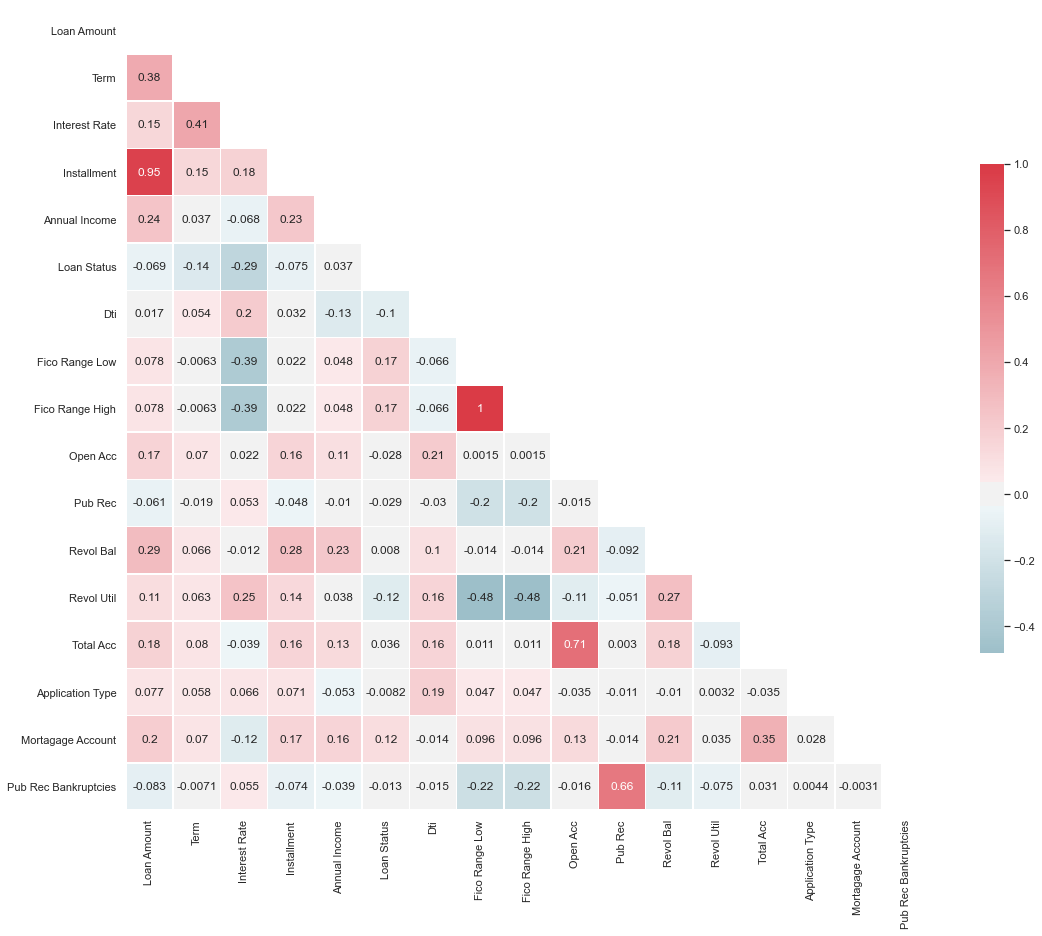

In [62]:
# Copied code from seaborn examples
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

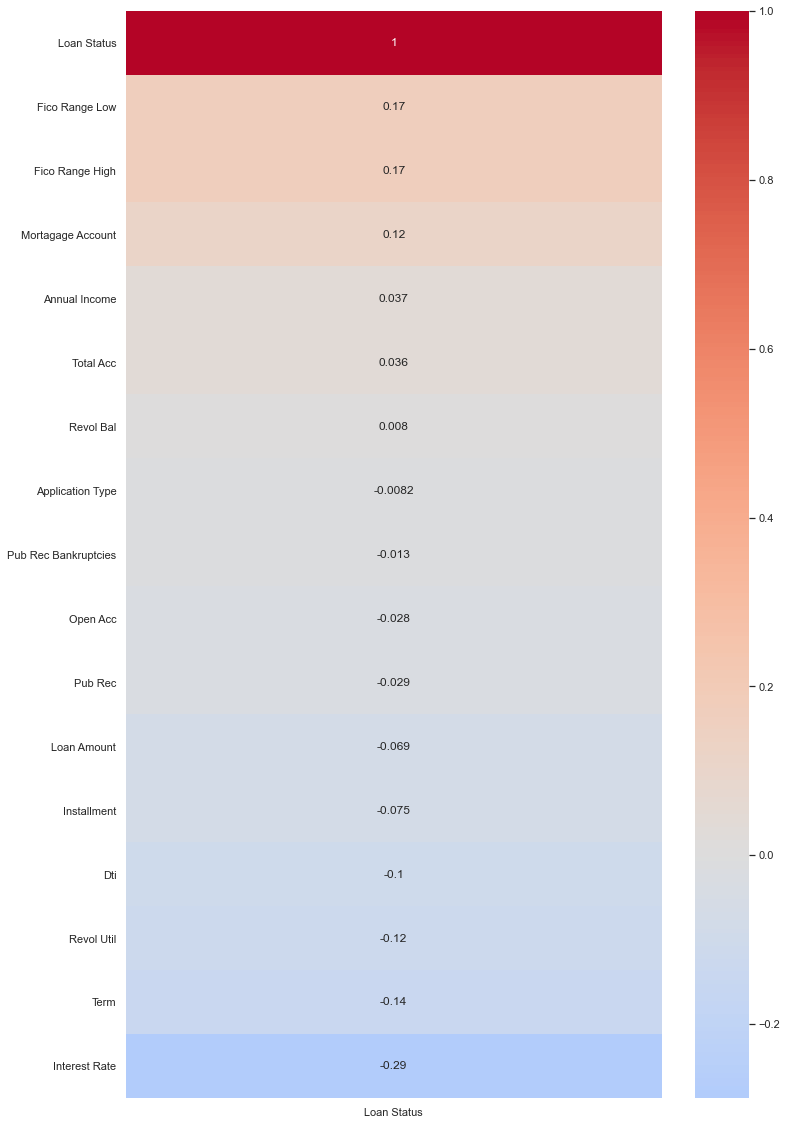

In [63]:
figure=plt.figure(figsize=(12,20))
sns.heatmap(df.corr()[['Loan Status']].sort_values('Loan Status',ascending=False),annot=True,cmap='coolwarm',center=0)

In [64]:
df = pd.get_dummies(df)
print(df.shape)

(73883, 140)


__Save data with Grade__

In [67]:
df.to_csv('data_with_grade.csv', index=None)